In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot  as plt

In [2]:
df = pd.read_excel("Data/Afluencia_Metro_2024.xlsx")

In [3]:
df = df.rename(columns={'Día':'Dia','Línea de Servicio':"Linea de Servicio"})

In [4]:
df['Dia'] = df['Dia'].str.replace(".","-")
df['Dia'] = pd.to_datetime(df['Dia'],format='%d-%m-%Y')

In [5]:
df_melted = pd.melt(df, id_vars=['Dia', 'Linea de Servicio'], var_name='Hora', value_name='Num pasajeros')

In [6]:
df_linea_hora = df_melted.groupby(['Linea de Servicio', 'Hora'])['Num pasajeros'].mean().reset_index()


In [7]:
df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_15824\3940219263.py:1: SyntaxWarning: invalid escape sequence '\('
  df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


In [9]:
print(df_linea_hora['Hora'].unique())

[datetime.time(4, 0) datetime.time(5, 0) datetime.time(6, 0)
 datetime.time(7, 0) datetime.time(8, 0) datetime.time(9, 0)
 datetime.time(10, 0) datetime.time(11, 0) datetime.time(12, 0)
 datetime.time(13, 0) datetime.time(14, 0) datetime.time(15, 0)
 datetime.time(16, 0) datetime.time(17, 0) datetime.time(18, 0)
 datetime.time(19, 0) datetime.time(20, 0) datetime.time(21, 0)
 datetime.time(22, 0) datetime.time(23, 0)]


In [8]:
plt.figure(figsize=(20, 6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [9]:
df_linea_hora['Hora'] = df_linea_hora['Hora'].astype(str).str[:-3]
df_linea_hora['Hora']

0      04:00
1      05:00
2      06:00
3      07:00
4      08:00
       ...  
246    19:00
247    20:00
248    21:00
249    22:00
250    23:00
Name: Hora, Length: 240, dtype: object

In [169]:
#df_linea_hora['Hora'] = pd.to_timedelta(df_linea_hora['Hora'].astype(str))

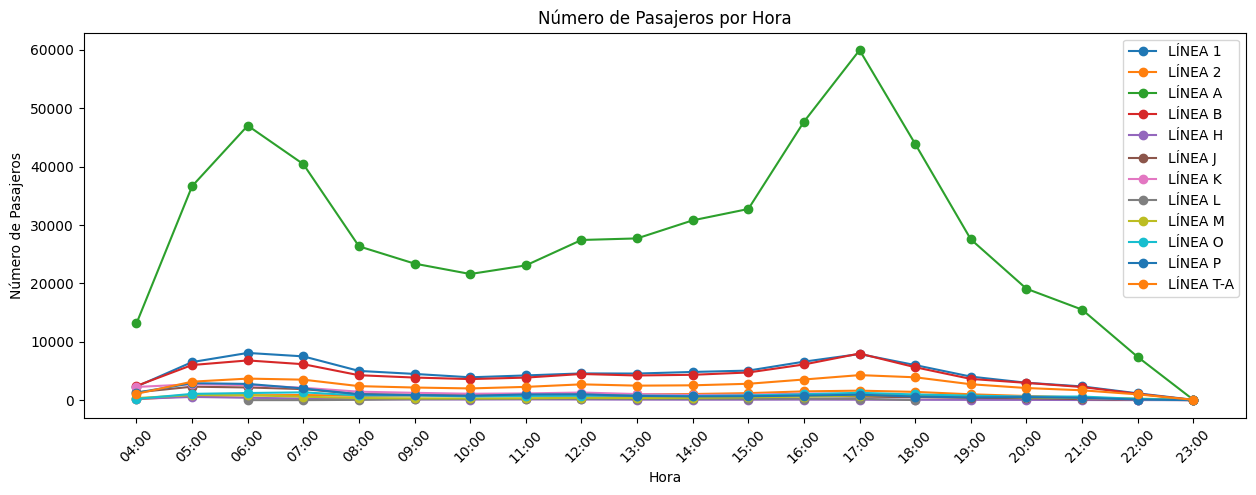

In [10]:
plt.figure(figsize=(15,5))
for linea in df_linea_hora['Linea de Servicio'].unique():
    subset = df_linea_hora[df_linea_hora['Linea de Servicio'] == linea]
    plt.plot(subset['Hora'].astype(str), subset['Num pasajeros'], marker='o', label=linea)

plt.xlabel('Hora')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Pasajeros por Hora')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [16]:
print(df_linea_hora['Linea de Servicio'].unique())

['LÍNEA 1' 'LÍNEA 2' 'LÍNEA A' 'LÍNEA B' 'LÍNEA H' 'LÍNEA J' 'LÍNEA K'
 'LÍNEA L' 'LÍNEA M' 'LÍNEA O' 'LÍNEA P' 'LÍNEA T-A']


In [11]:
linea_category = {
    'LÍNEA 1' : 'Metro Plus',
    'LÍNEA 2' : 'Metro Plus',
    'LÍNEA A' : 'Metro',
    'LÍNEA B' : 'Metro',
    'LÍNEA H' : 'Cable',
    'LÍNEA J' : 'Cable',
    'LÍNEA K' : 'Cable',
    'LÍNEA L' : 'Cable',
    'LÍNEA M' : 'Cable',
    'LÍNEA O' : 'Metro Plus',
    'LÍNEA P' : 'Cable',
    'LÍNEA T-A' : 'Tranvia',

}

In [12]:
df_linea_hora['Sistema'] = df_linea_hora['Linea de Servicio'].map(linea_category)

In [13]:
df_system = df_linea_hora.groupby(['Sistema'])['Num pasajeros'].sum().reset_index()

In [14]:
df_system

,Sistema,Num pasajeros
0,Cable,73623.791588
1,Metro,655746.673033
2,Metro Plus,124469.732960
3,Tranvia,50028.714799


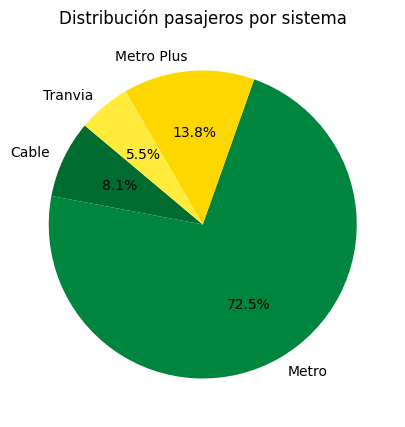

In [84]:
plt.figure(figsize=(15,5))
colores_metro_medellin = [ '#006C30','#00853F', '#FFD700', '#FFEB3B']  # Verdes y amarillos
plt.pie(df_system['Num pasajeros'], labels=df_system['Sistema'], autopct='%1.1f%%', startangle=140, colors = colores_metro_medellin)
plt.title('Distribución pasajeros por sistema')
plt.show()


In [39]:
df_melted

,Dia,Linea de Servicio,Hora,Num pasajeros
0,2024-01-01,LÍNEA 1,04:00:00,180.0
1,2024-01-01,LÍNEA 2,04:00:00,1.0
2,2024-01-01,LÍNEA A,04:00:00,1460.0
3,2024-01-01,LÍNEA B,04:00:00,231.0
4,2024-01-01,LÍNEA H,04:00:00,NaN
...,...,...,...,...
45040,2024-06-30,LÍNEA L,Total general (Número de pasajeros),1516.0
45041,2024-06-30,LÍNEA M,Total general (Número de pasajeros),4474.0
45042,2024-06-30,LÍNEA O,Total general (Número de pasajeros),6515.0
45043,2024-06-30,LÍNEA P,Total general (Número de pasajeros),7151.0


In [39]:
df_dia_hora = df_melted.groupby(['Linea de Servicio','Dia','Hora'])['Num pasajeros'].mean().reset_index()


In [26]:
dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

In [40]:
df_dia_hora['Dia_Semana'] = df_dia_hora['Dia'].dt.day_name().map(dias_semana)

In [41]:
df_dia_hora = df_dia_hora[~df_dia_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_15824\2725425442.py:1: SyntaxWarning: invalid escape sequence '\('
  df_dia_hora = df_dia_hora[~df_dia_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


In [73]:
df_dia_hora['Hora'] = df_dia_hora['Hora'].astype(str)
def agrupar_hora(hora):
    if '04:00:00' <= hora < '08:00:00':
        return 'Madrugada'
    elif '08:00:00' <= hora < '12:00:00':
        return 'Mañana'
    elif '12:00:00' <= hora < '18:00:00':
        return 'Tarde'
    elif '18:00:00' <= hora <= '23:00:00':
        return 'Noche'
    else:
        return 'Otros'
    


df_dia_hora['Rango_Hora'] = df_dia_hora['Hora'].apply(agrupar_hora)

In [74]:
df_filtered = df_dia_hora.groupby(['Dia_Semana', 'Rango_Hora'])['Num pasajeros'].mean().reset_index()


#df_system = df_linea_hora.groupby(['Sistema'])['Num pasajeros'].sum().reset_index()

In [75]:
df_filtered

,Dia_Semana,Rango_Hora,Num pasajeros
0,Domingo,Madrugada,2152.423622
1,Domingo,Mañana,1861.432861
2,Domingo,Noche,1795.998605
3,Domingo,Tarde,2415.643474
4,Jueves,Madrugada,6460.817857
5,Jueves,Mañana,3685.754286
6,Jueves,Noche,3140.636034
7,Jueves,Tarde,5333.256974
8,Lunes,Madrugada,5961.403147
9,Lunes,Mañana,3406.340278


In [61]:
df_filtered

,Dia_Semana,Rango_Hora,Num pasajeros
0,Domingo,Madrugada,2152.423622
1,Domingo,Mañana,1861.432861
2,Domingo,Noche,1795.998605
3,Domingo,Tarde,2415.643474
4,Jueves,Madrugada,6460.817857
5,Jueves,Mañana,3685.754286
6,Jueves,Noche,3140.636034
7,Jueves,Tarde,5333.256974
8,Lunes,Madrugada,5961.403147
9,Lunes,Mañana,3406.340278


In [76]:
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_filtered['Dia_Semana'] = pd.Categorical(df_filtered['Dia_Semana'], categories=dias_orden, ordered=True)

In [77]:
rangos_orden = ['Madrugada','Mañana','Tarde','Noche']
df_filtered['Rango_Hora'] = pd.Categorical(df_filtered['Rango_Hora'], categories=rangos_orden,ordered=True)

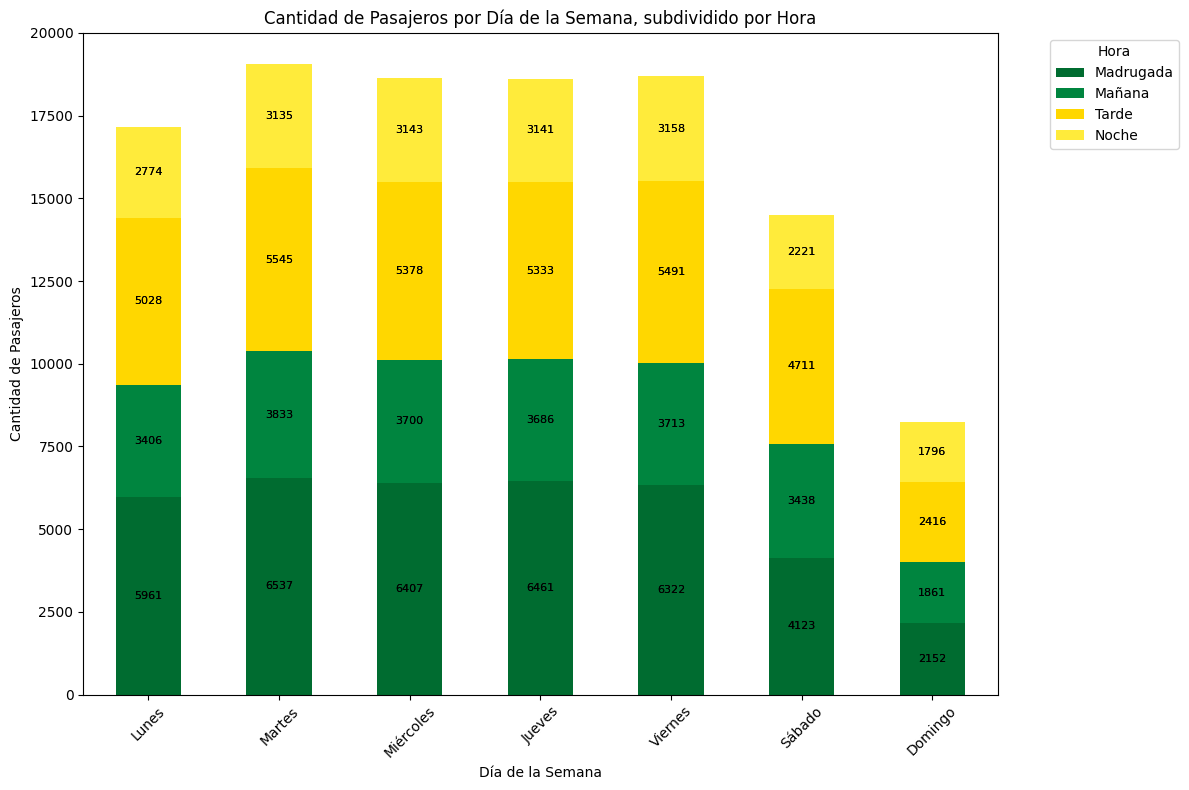

In [83]:
# Crea una tabla pivote para tener cada día en columnas y las horas en el índice
pivot_data = df_filtered.pivot(index='Dia_Semana', columns='Rango_Hora', values='Num pasajeros')

# Define una paleta de colores inspirada en el Metro de Medellín
colores_metro_medellin = [ '#006C30','#00853F', '#FFD700', '#FFEB3B']  # Verdes y amarillos

# Genera el gráfico de columnas apiladas y asigna a ax
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=colores_metro_medellin)

# Añade etiquetas de datos en cada sección de las columnas
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.0f', fontsize=8)

    ax.bar_label(c, label_type='center', fmt='%.0f', fontsize=8)
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Cantidad de Pasajeros por Día de la Semana, subdividido por Hora')
plt.legend(title='Hora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
